<font face="Times New Roman" size=5><div dir=rtl align=center>
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br> <br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Computer
</font>
<br> <br>
<font color="#008080" size=5>
Introduction to Machine Learning
</font>

<hr/> <br>
<font color="#800080" size=6>
Chapter 4: Bagging & Boosting
<br>
</font>
<br>
<font face="Times New Roman" size=4>
:authors <br>
<b>OmidReza Heydari</b>
</font>
<hr>
</div></font>

<font  size=5><div dir=ltr>
<font face="Times New Roman" color="#008080" size=5>**Table of Contents**</font>
<br>

<font size=4>
<ul>
        <li>
            <a href="#0">
                0. Dataset
            </a>
        </li>
        <li>
            <a href="#1">
                1. Majority Voting
            </a>
        </li>
        <li>
            <a href="#2">
                2. Bagging
            </a>
        </li>
        <ul>
            <li>
                <a href="#2-1">
                    2-1. Out Of Bag Validation
                </a>
            </li>
        </ul>
        <li>
            <a href="#3">
                3. Pasting
            </a>
        </li>
        <li>
            <a href="#4">
                4. Random Forest
            </a>
        </li>
        <li>
            <a href="#5">
                5. Extra-Trees
            </a>
        </li>
        <li>
            <a href="#6">
                6. Boosting
            </a>
        </li>
        <ul>
            <li>
                <a href="#6-1">
                    6-1. AdaBoost
                </a>
            </li>
            <ul>
                <li>
                    <a href="#6-1-1">
                        6-1-1. SAMME
                    </a>
                </li>
                <li>
                    <a href="#6-1-2">
                        6-1-2. SAMME.R
                    </a>
                </li>
            </ul>
            <li>
                <a href="#6-2">
                    6-2. Gradient Boost
                </a>
            </li>
            <ul>
                <li>
                    <a href="#6-2-1">
                        6-2-1. Without scikit-learn
                    </a>
                </li>
                <li>
                    <a href="#6-2-2">
                        6-2-2. With scikit-learn
                    </a>
                </li>
            </ul>
            <li>
                <a href="#6-3">
                    6-3. Early Stopping
                </a>
            </li>
            <ul>
                <li>
                    <a href="#6-3-1">
                        6-3-1. Method
                    </a>
                </li>
                <li>
                    <a href="#6-3-2">
                        6-3-2. Find Min Validation Error
                    </a>
                </li>
            </ul>
            <li>
                <a href="#6-4">
                    6-4. XGBoost
                </a>
            </li>
            <li>
                <a href="#6-5">
                    6-5. CatBoost
                </a>
            </li>
            <ul>
                <li>
                    <a href="#6-5-1">
                        6-5-1. Categorical Features
                    </a>
                </li>
            </ul>
        </ul>
    <li>
                <a href="#7">
                    7. Stacking
                </a>
            </li>
            <ul>
                <li>
                    <a href="#7-1">
                        7-1. Multi-layer Stacking
                    </a>
                </li>
            </ul>
</ul>
</div>

<font face="Times New Roman"><div id="0">
# <font color="#800080" size=6>**0. Dataset**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Introduction to Dataset </font>

<font face="Times New Roman" size=3>
The dataset of this section belongs to a marketing campaign of a bank in Portugal. You can find more information about this dataset in this <a href="">link</a>. This dataset is used for all next methodologies.
</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Files/bank-full.csv")
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


##### <font color="#008080" face="Times New Roman" size=4> - More Information About Dataset </font>

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### <font color="#008080" face="Times New Roman" size=4> - Visualizing Dataset </font>

##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing Dataset</font>

In [7]:
from sklearn.preprocessing import LabelEncoder

# First of all we should change non-numerical values to numbers
encoder = LabelEncoder()
columns_to_encode = ['job', 'marital', 'education', 'month', 'contact', 'poutcome', 'housing', 'loan', 'Target', 'default']
for column_to_encode in columns_to_encode:
    encoder.fit(np.array(df[column_to_encode]))
    df[column_to_encode]=encoder.transform(df[column_to_encode])

In [8]:
# Next step is removing unknown rows
colums_have_unknow=['job', 'marital', 'education', 'default', 'housing', 'loan']
for colum_has_unknow in colums_have_unknow:
    df.drop(df[df[colum_has_unknow] == 'unknow'].index, inplace = True)

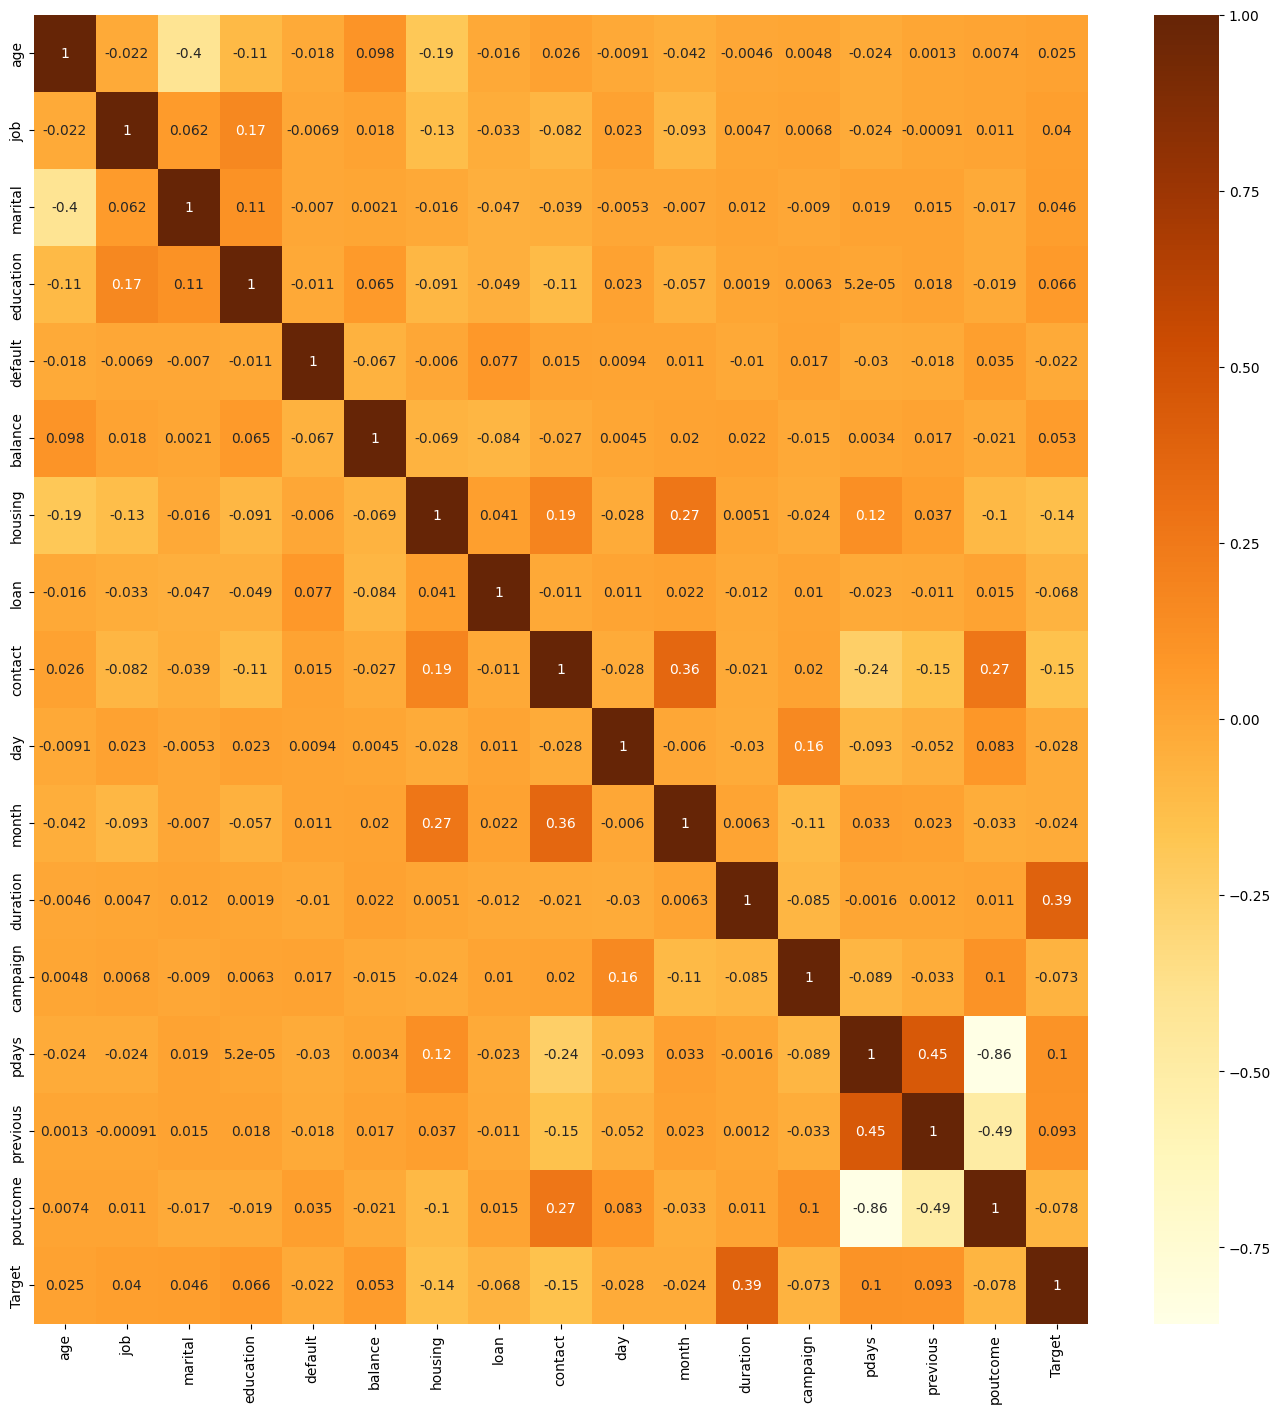

In [9]:
from sklearn.model_selection import train_test_split

# split labels and features
y = df["Target"].copy()
x = df.drop("Target", axis=1)

# split test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

plt.figure(figsize=(17,17))
sns.heatmap(data = df.corr(), annot=True, cmap="YlOrBr")
plt.show()

<font face="Times New Roman"><div id="1">
# <font color="#800080" size=6>**1. Majority Voting** </font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [10]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Create models
log_clf = LogisticRegression(solver='lbfgs', max_iter=30000, random_state = 42)
dt_clf = DecisionTreeClassifier(random_state = 42)
svm_clf = SVC(random_state = 42)
hard_voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)])

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [11]:
from sklearn.metrics import accuracy_score

results = {}
for clf in (dt_clf, svm_clf, log_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    results[clf.__class__.__name__] = accuracy_score(y_test, y_pred)

hard_voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=30000,
                                                 random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

In [12]:
y_pred = hard_voting_clf.predict(x_test)
results["HardVotingClassifier"] = accuracy_score(y_test, y_pred)

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

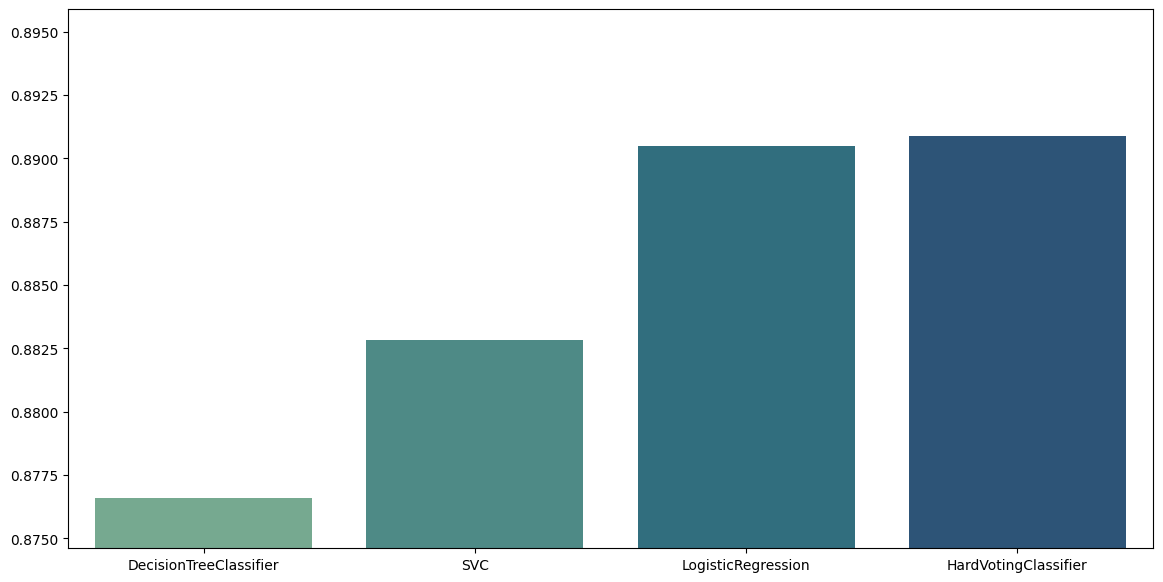

In [13]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=list(results.keys()), y=list(results.values()), palette="crest")
ax.set_ylim([min(list(results.values()))-0.002, max(list(results.values()))+0.005])
plt.show()

<font face="Times New Roman"><div id="2">
# <font color="#800080" size=6>**2. Bagging** </font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=True, n_jobs=-1)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [15]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=400,
                  n_estimators=2000, n_jobs=-1)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction </font>

In [16]:
y_pred = bag_clf.predict(x_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [17]:
accuracy_score(y_test, y_pred)

0.8972520107238606

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

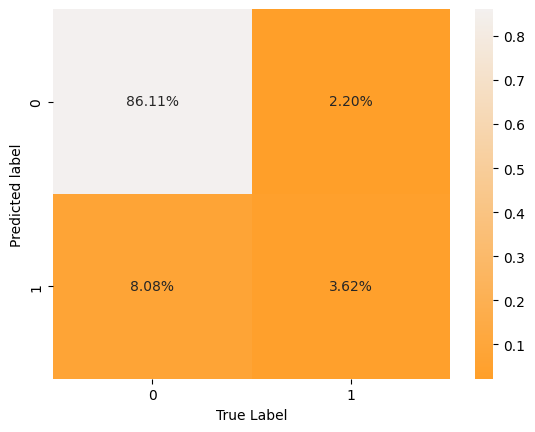

In [18]:
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(y_test, y_pred):
  clr_plt = sns.light_palette("#FF9F29", reverse=True, as_cmap=True)
  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%',cmap=clr_plt)
  plt.ylabel('Predicted label')
  plt.xlabel('True Label')
  plt.show

show_confusion_matrix(y_test, y_pred)

<font face="Times New Roman"><div id="2-1">
## <font color="#800080" size=6>**2-1. Out Of Bag Validation**</font>
</div>

In [19]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(x_train, y_train)
print("OOB Score: " + str(bag_clf.oob_score_))
print("Accuracy Score : "+ str(accuracy_score(y_test, bag_clf.predict(x_test))))

OOB Score: 0.9037667954177808
Accuracy Score : 0.9044235924932976


<font face="Times New Roman"><div id="3">
# <font color="#800080" size=6>**3. Pasting** </font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=False, n_jobs=-1)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [21]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=400, n_estimators=2000, n_jobs=-1)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction </font>

In [22]:
y_pred = bag_clf.predict(x_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [23]:
accuracy_score(y_test, y_pred)

0.8959785522788204

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

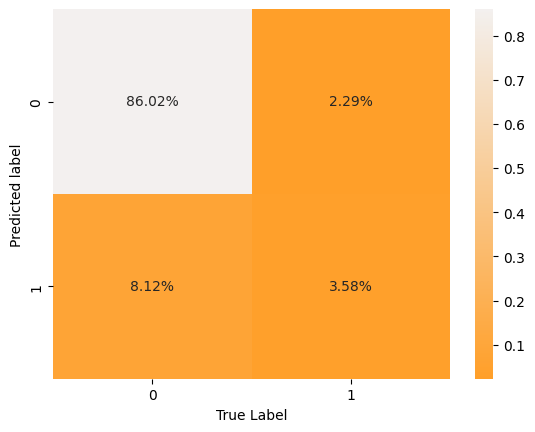

In [24]:
show_confusion_matrix(y_test, y_pred)

<font face="Times New Roman"><div id="4">
# <font color="#800080" size=6>**4. Random Forest** </font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [25]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [26]:
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction </font>

In [27]:
y_pred_rf = rnd_clf.predict(x_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [28]:
accuracy_score(y_test, y_pred)

0.8959785522788204

<font face="Times New Roman"><div id="5">
# <font color="#800080" size=6>**5. Extra-Trees**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
ex_tree_clf = ExtraTreesClassifier(n_estimators=500)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [30]:
ex_tree_clf.fit(x_train, y_train)

ExtraTreesClassifier(n_estimators=500)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction </font>

In [31]:
y_pred_rf = ex_tree_clf.predict(x_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [32]:
accuracy_score(y_test, y_pred)

0.8959785522788204

<font face="Times New Roman"><div id="6">
# <font color="#800080" size=6>**6. Boosting**</font>
</div>

<font face="Times New Roman"><div id="6-1">
## <font color="#800080" size=6>**6-1. AdaBoost**</font>
</div>

<font face="Times New Roman"><div id="6-1-1">
### <font color="#800080" size=5>**6-1-1. SAMME**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME", learning_rate=0.5)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [34]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Predictoin </font>

In [35]:
y_pred = ada_clf.predict(x_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [36]:
accuracy_score(y_test, y_pred)

0.8948391420911528

<font face="Times New Roman"><div id="6-1-2">
### <font color="#800080" size=5>**6-1-2. SAMME.R**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [38]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Predictoin </font>

In [39]:
y_pred = ada_clf.predict(x_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [40]:
accuracy_score(y_test, y_pred)

0.8989276139410187

<font face="Times New Roman"><div id="6-2">
## <font color="#800080" size=6>**6-2. Gradient Boost**</font>
</div>

<font face="Times New Roman"><div id="6-2-1">
### <font color="#800080" size=5>**6-2-1. Without Scikit-Learn**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [41]:
tree_cl1 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_cl1.fit(x_train, y_train)

y2 = y_train - tree_cl1.predict(x_train)
tree_cl2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_cl2.fit(x_train, y2)

y3 = y2 - tree_cl2.predict(x_train)
tree_cl3 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_cl3.fit(x_train, y3)

DecisionTreeClassifier(max_depth=2, random_state=42)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Predictoin </font>

In [42]:
y_pred = sum(tree.predict(x_test) for tree in (tree_cl1, tree_cl2, tree_cl3))

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [43]:
accuracy_score(y_test, y_pred)

0.8880026809651475

<font face="Times New Roman"><div id="6-2-2">
### <font color="#800080" size=5>**6-2-2. with Scikit-Learn**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=2, n_estimators=5, random_state=42, learning_rate=1.0)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [45]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=5,
                           random_state=42)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Predictoin </font>

In [46]:
y_pred = gbc.predict(x_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [47]:
accuracy_score(y_test, y_pred)

0.8939678284182305

<font face="Times New Roman"><div id="6-3">
## <font color="#800080" size=6>**6-3. Early Stopping**</font>
</div>

<font face="Times New Roman"><div id="6-3-1">
### <font color="#800080" size=5>**6-3-1. Method**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Methodology**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Implementation </font>

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

result={}
for count_of_estimators in range(1, 70):
  gbc = GradientBoostingClassifier(max_depth=2, n_estimators=count_of_estimators, random_state=42, learning_rate=1.0)
  gbc.fit(x_train, y_train)
  y_pred = gbc.predict(x_test)
  val_error = mean_squared_error(y_test, y_pred)
  result[count_of_estimators]=val_error

##### <font color="#008080" face="Times New Roman" size=4> - Visualization </font>

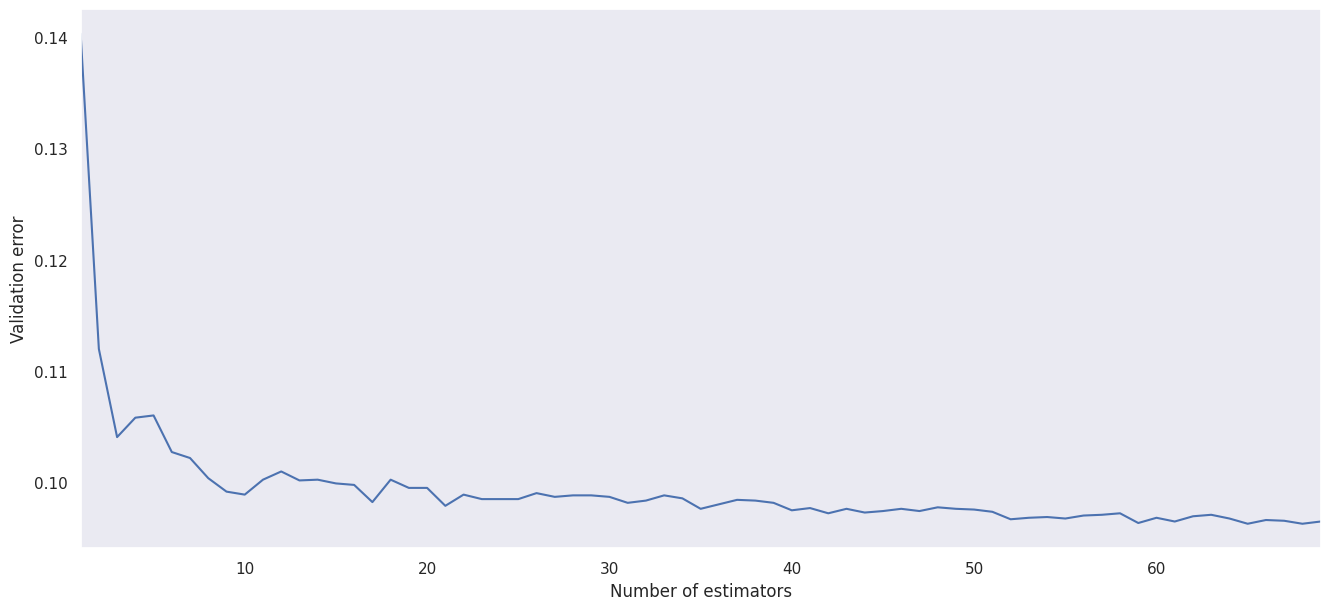

In [49]:
plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(result.keys()), y=list(result.values()))
plt.xlabel("Number of estimators")
plt.ylabel("Validation error")
ax.set_xlim([1, max(list(result.keys()))])
plt.show()

##### <font color="#008080" face="Times New Roman" size=4> - Result </font>

In [50]:
print("The best number for estimators is: "+ str(list(result.values()).index(min(list(result.values())))+1))
print("The minimum value for validation error is: "+ str(min(list(result.values()))))

The best number for estimators is: 65
The minimum value for validation error is: 0.09631367292225201


<font face="Times New Roman"><div id="6-3-2">
### <font color="#800080" size=5>**6-3-2. Find Min Validation Error**</font>
</div>

In [51]:
gbc = GradientBoostingClassifier(max_depth=2, warm_start = True, random_state=42, learning_rate=1.0)
min_val_error = float("inf")
error_going_up = 0
number_of_steps_to_checks=5
for n_estimators in range(1, 70):
    gbc.n_estimators = n_estimators
    gbc.fit(x_train, y_train)
    y_pred = gbc.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break
gbc.n_estimators = gbc.n_estimators - number_of_steps_to_checks
print("The best n_stimators value is: " + str(gbc.n_estimators))

The best n_stimators value is: 10


In [52]:
gbc = GradientBoostingClassifier(max_depth=2, random_state=42, learning_rate=1.0)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
val_error = mean_squared_error(y_test, y_pred)
print("The minimum value for validation error according the above algorithm is: " + str(val_error))

The minimum value for validation error according the above algorithm is: 0.09711796246648793


<font face="Times New Roman"><div id="6-4">
## <font color="#800080" size=6>**6-4. XGBoost**</font>
</div>

In [53]:
!pip install xgboost

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [54]:
from xgboost import XGBClassifier
XG_classifier = XGBClassifier(random_state = 42)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [55]:
XG_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

In [56]:
y_pred = XG_classifier.predict(x_test)

In [57]:
accuracy_score(y_test, y_pred)

0.9070375335120644

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

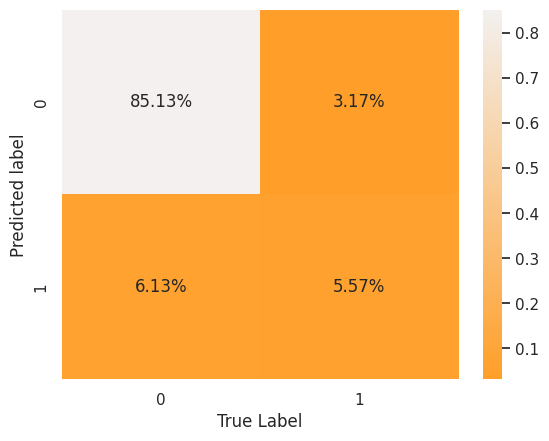

In [58]:
show_confusion_matrix(y_test, y_pred)

<font face="Times New Roman"><div id="6-5">
## <font color="#800080" size=6>**6-5. CatBoost**</font>
</div>

In [59]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00


<font face="Times New Roman"><div id="6-5-1">
### <font color="#800080" size=5>**6-5-1. Categorical Features**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Load Dataset </font>

In [60]:
df = pd.read_csv('../Files/bank-full.csv')

##### <font color="#008080" face="Times New Roman" size=4> - Preprocessing Dataset </font>

In [61]:
colums_have_unknow=['job', 'marital', 'education', 'default', 'housing', 'loan']
for colum_has_unknow in colums_have_unknow:
    df.drop(df[df[colum_has_unknow] == 'unknow'].index, inplace = True)

y = df["Target"].copy()
x = df.drop("Target", axis=1)
cat_features = list(range(0, x.shape[1]))

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [62]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=5, learning_rate=0.1)

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [63]:
clf.fit(x_train, y_train, cat_features=cat_features,  verbose=False)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction </font>

In [64]:
y_pred = clf.predict(x_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [65]:
accuracy_score(y_test, y_pred)

0.8922922252010724

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

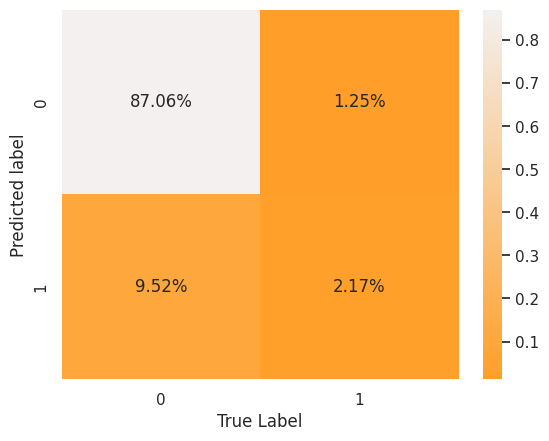

In [66]:
show_confusion_matrix(y_test, y_pred)

<font face="Times New Roman"><div id="7">
# <font color="#800080" size=6>**7. Stacking**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [67]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=3)
stacking_clf = StackingClassifier(estimators=[('rf', rf_clf), ('svc', svm_clf), ('knn', knn_clf)], final_estimator=LogisticRegression())

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [68]:
stacking_clf.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svc', SVC(random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=LogisticRegression())

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction </font>

In [69]:
y_pred = stacking_clf.predict(x_test)

##### <font color="#008080" face="Times New Roman" size=4> - Accuracy </font>

In [70]:
accuracy_score(y_test, y_pred)

0.8998659517426274

#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

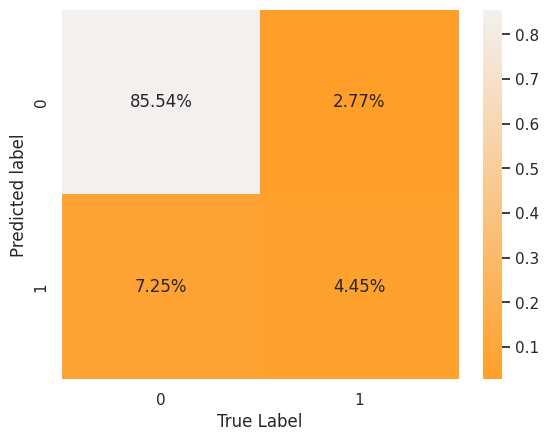

In [71]:
show_confusion_matrix(y_test, y_pred)

<font face="Times New Roman"><div id="7-1">
## <font color="#800080" size=6>**7-1. Multi-layer Stacking**</font>
</div>

In [72]:
# Note: To be able to run the two last cells, the result should be stored in the `y_pred` variable


In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
show_confusion_matrix(y_test, y_pred)